# **Final Task Prediksi Skor Kredit**

## **Pembacaan dan Review Data`**

#### **Melihat Data**

##### **Membaca dan mengambil file yang ada di dalam google drive yang dipakai**

Melakukan penyambungan penyimpanan google drive dan google collab untuk pengambilan data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/rakamin home credit

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/rakamin home credit


Menampilkan isi yang ada di dalam penyimpanan google drive yang dipakai

In [2]:
ls

 application_test.csv     'Final Task CatBoost.ipynb'              Log_ROC.png
 application_train.csv    'Final Task FNN.ipynb'                   POS_CASH_balance.csv
 bureau_balance.csv       'Final Task Logistic Regression.ipynb'   previous_application.csv
 bureau.csv               'Final Task XGBoost.ipynb'               sample_submission.csv
 catboost_info/            HomeCredit_columns_description.csv
 credit_card_balance.csv   installments_payments.csv


##### **Menampilkan 5 Data Teratas**

In [3]:
import pandas as pd
dt = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/rakamin home credit/application_train.csv')
dt.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### **Melihat Informasi Data Secara Keseluruhan**

Menampilkan informasi objek

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Melakukan deteksi validasi nilai pada objek

In [5]:
dt.notnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False
307507,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False
307508,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
307509,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Melakukan pengecekan jumlah nilai yang hilang pada objek

In [6]:
nulls = dt.isnull().sum().to_frame()
for index, row in nulls.iterrows():
  print(index, row[0])

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

mengecek tipe data dari setiap kolom

In [7]:
dt.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Mengecek kolom target

In [8]:
dt.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## **Data Preprocessing`**

#### **Melakukan Feature Selection**

##### Melakukan penghilangan kolom berdasarkan penilaian missing value

Pengecekan kolom yang memiliki data kosong diatas 50%

In [9]:
import pandas as pd

# Function to calculate missing values by column in a DataFrame
def missing_values_table(df):
    # Calculate total missing values
    mis_val = dt.isnull().sum()

    # Calculate percentage of missing values
    mis_val_percent = 100 * dt.isnull().sum() / len(dt)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending, after excluding columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print(f"Your selected dataframe has {df.shape[1]} columns.\n"
          f"There are {mis_val_table_ren_columns.shape[0]} columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# Apply the function to your data
missing_values = missing_values_table(dt)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Pengecekan kolom kategorikal yang memiliki nilai unik

In [10]:
unique_counts = dt.select_dtypes('object').apply(pd.Series.nunique)
unique_counts

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Melakukan penghilangan kolom berdasarkan penilaian data kosong diatas 50%

In [11]:
hapus_kolom2 = list(missing_values[missing_values > 0.5].index)
kolom12= set(hapus_kolom2)

dt.drop(kolom12, axis=1, inplace=True)
dt.shape

(307511, 55)

##### Melakukan Pengecekan Missing Value

Melakukan perhitungan total dari data yang kosong

In [12]:
dt.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGIO

Menampilkan Heatmap

<ipython-input-13-4bf3f0ecd558>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt.corr(), annot=True, annot_kws={'size':7})


<Axes: >

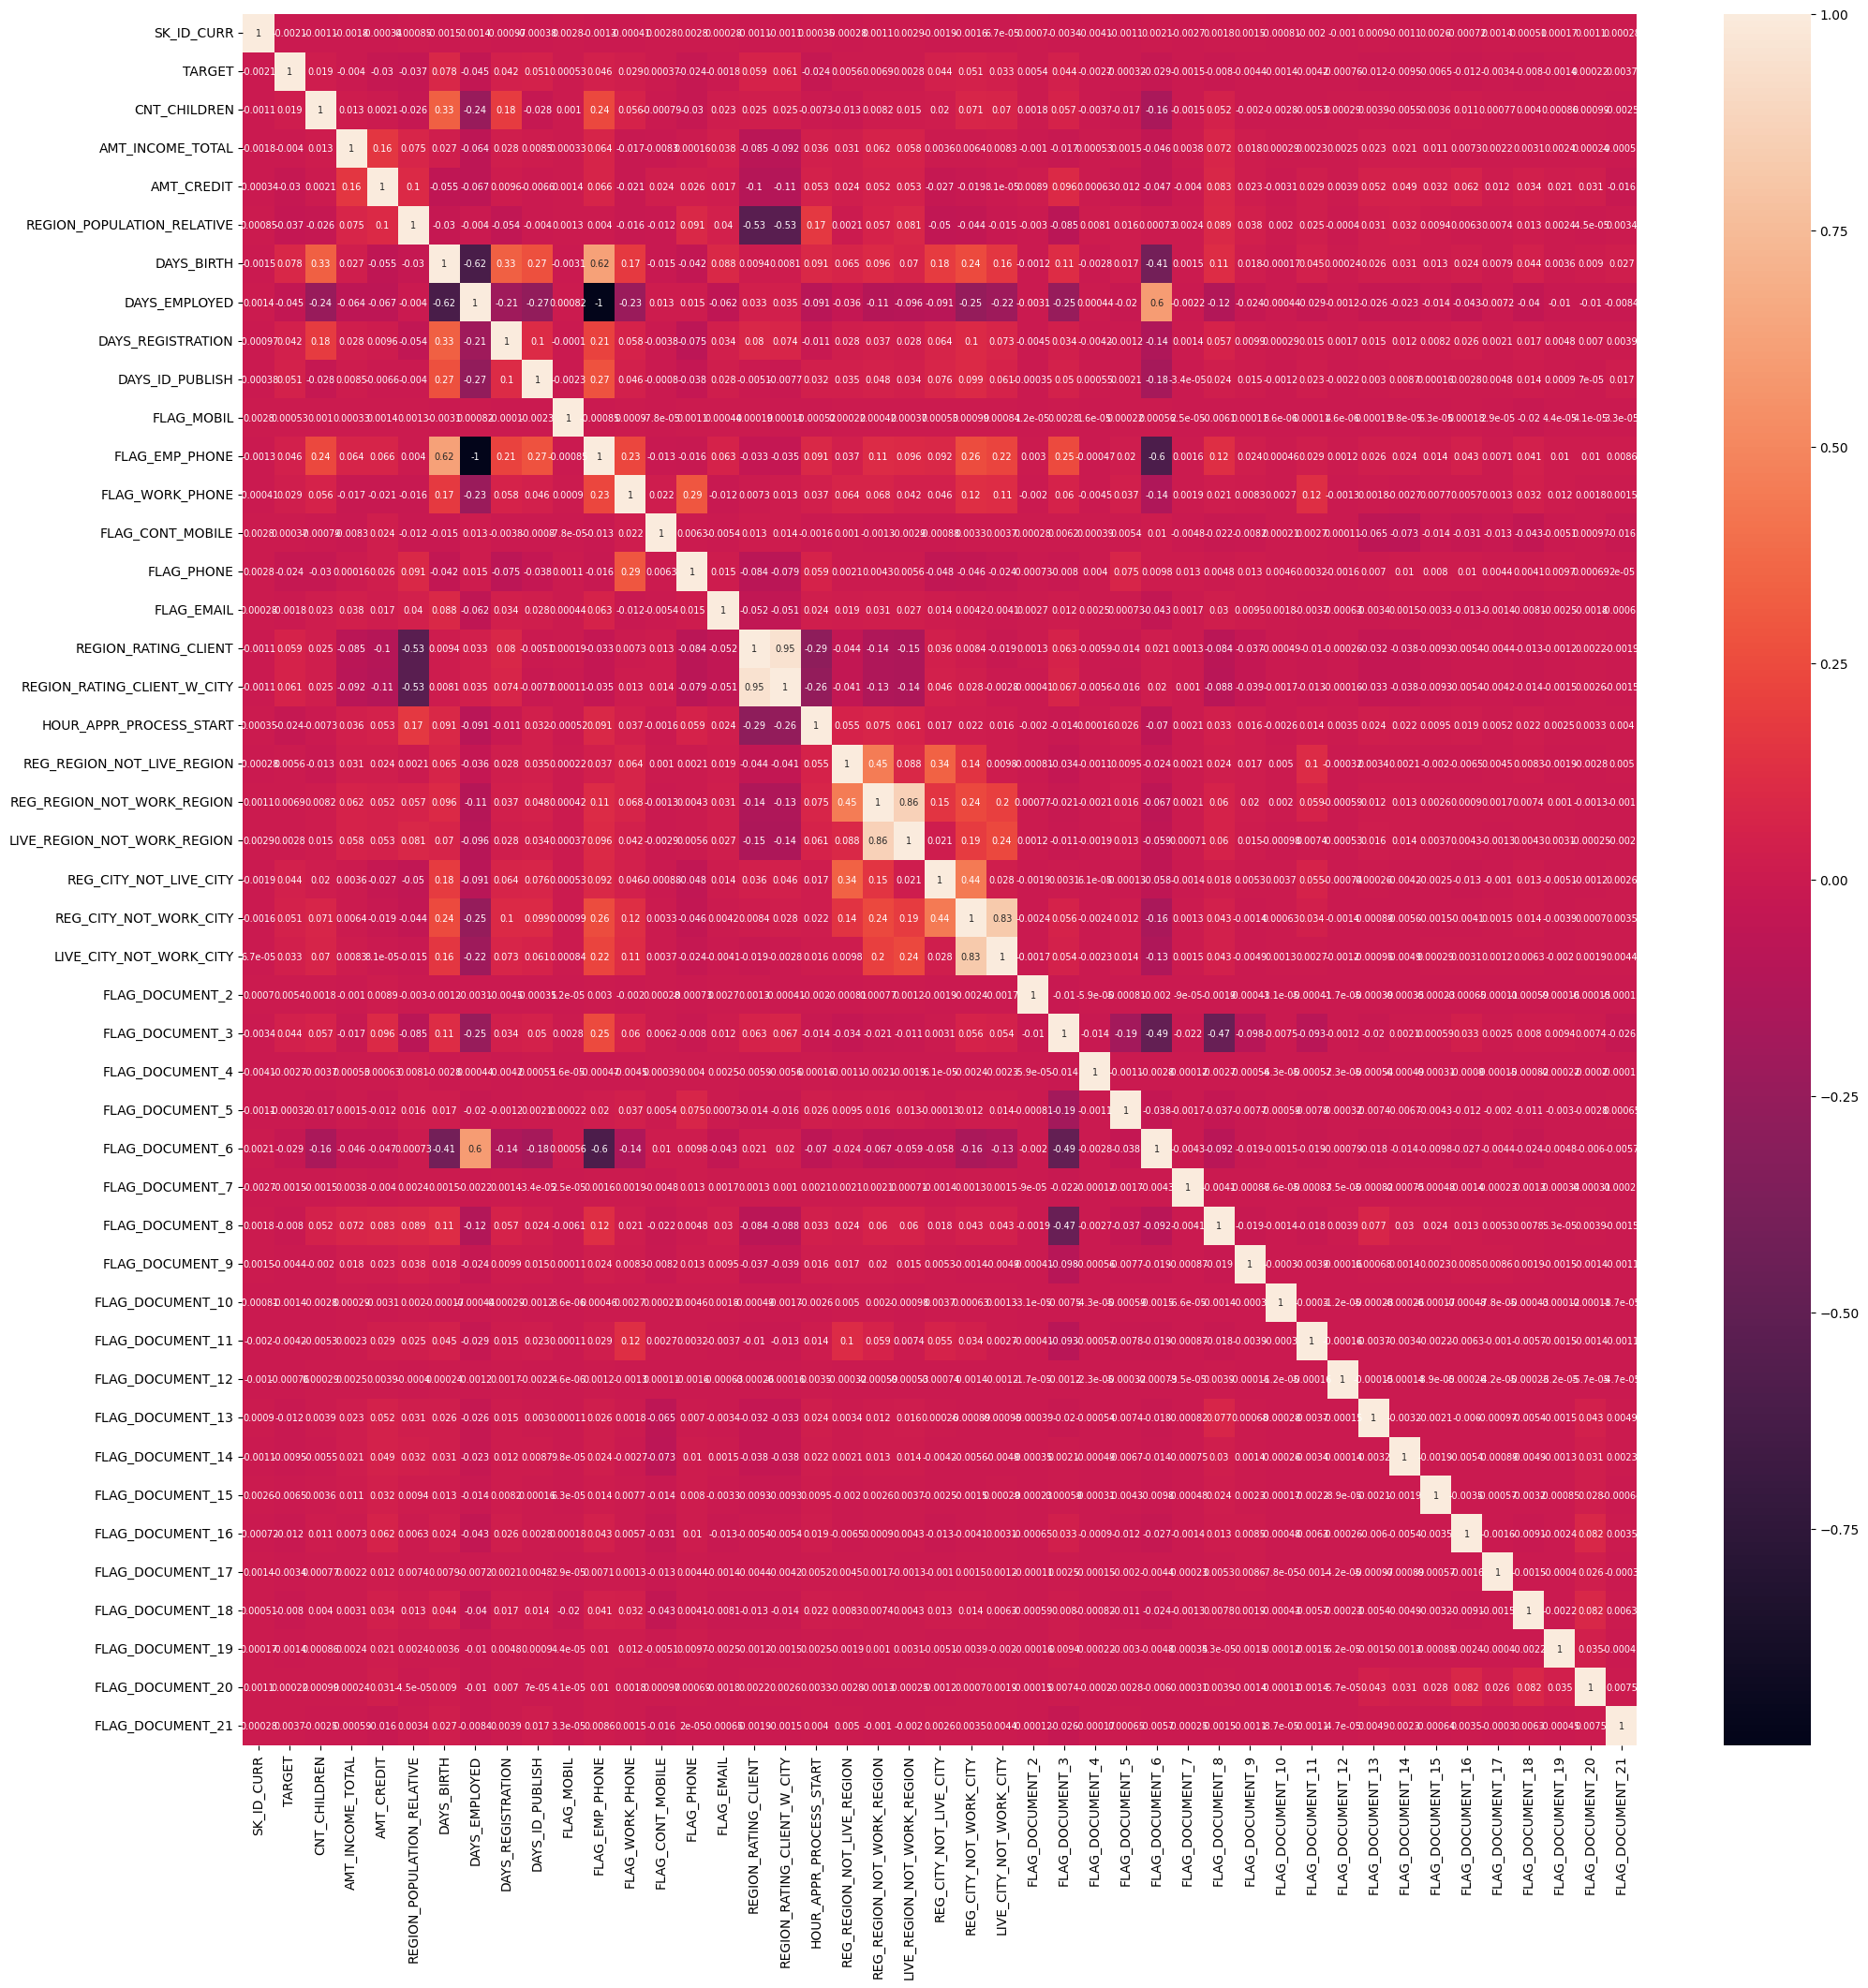

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#Check correlation
plt.figure(figsize=(24,24))
sns.heatmap(dt.corr(), annot=True, annot_kws={'size':7})

Reset Index

In [14]:
dt.reset_index(drop= True, inplace = True)

#### **Melakukan Pengecekan Fitur Tipe Data**

In [15]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

## **Exploratory Data Analysis`**

### **Bar Chart**

In [16]:
def annot_plot(ax,w,h):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  for p in ax.patches:
      ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

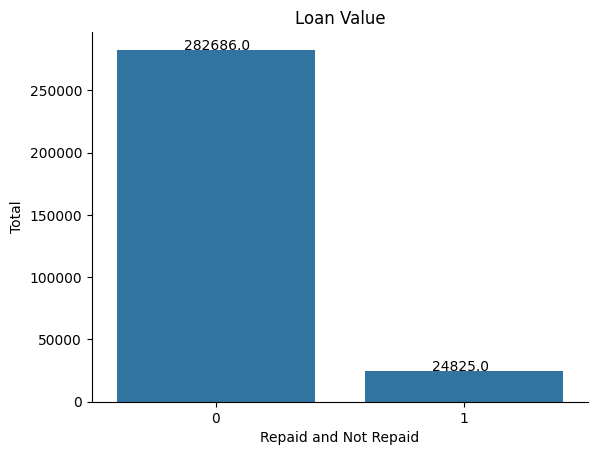

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(dt ,x='TARGET')
annot_plot(ax, 0.27,1)

plt.title("Loan Value")
plt.xlabel('Repaid and Not Repaid')
plt.ylabel('Total')

plt.show()

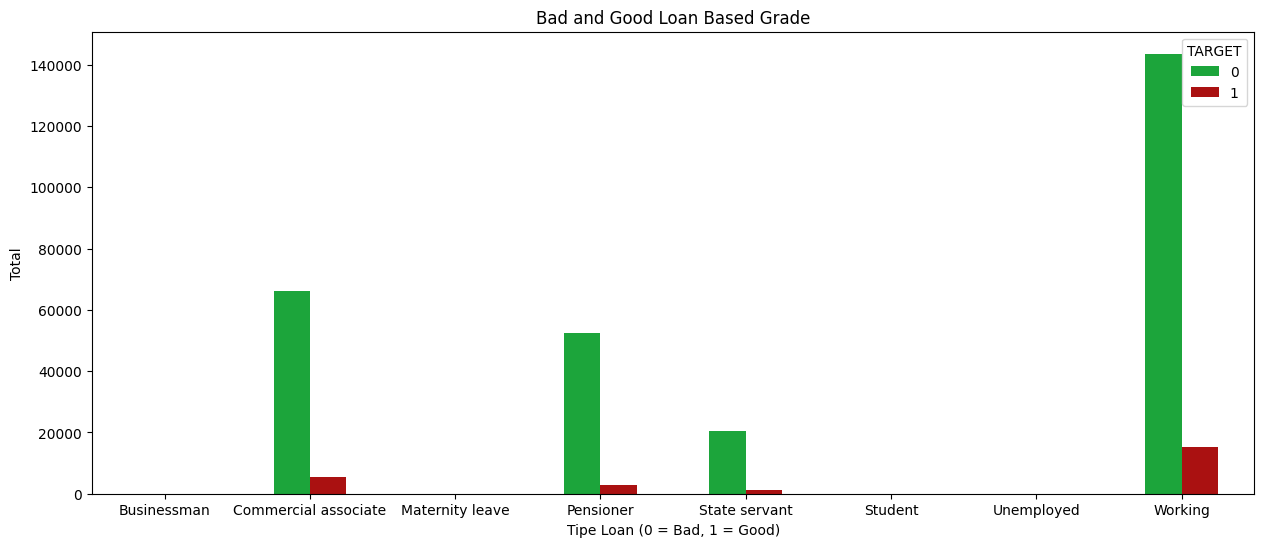

In [18]:
pd.crosstab(dt.NAME_INCOME_TYPE,dt['TARGET']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Bad and Good Loan Based Grade')
plt.xlabel('Tipe Loan (0 = Bad, 1 = Good)')
plt.xticks(rotation=0)
plt.ylabel('Total')
plt.show()

### **Klasifikasi Feature**

Pengelompokkan Feature berdasarkan Numeric dan Categorical

In [19]:
numeric_features = list(dt.select_dtypes(["float64" , "int64",'int32']).columns)
n = numeric_features.index('TARGET')
del n

categorical_features = list(dt.select_dtypes("object").columns)

target = "TARGET"

print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

categorical_features:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'F

## **Encoding & Normalization`**

### **One Hot Encoding**

In [20]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = [col for col in categorical_features]
onehot_cols = pd.get_dummies(dt[cat_cols], drop_first=True)
onehot_cols

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
307508,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307509,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Normalization**

Normalisasi Data Menggunakan MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = [col for col in numeric_features  if col not in cat_cols + ['TARGET']]
normal = pd.DataFrame(scaler.fit_transform(dt[num_cols]), columns=num_cols)

normal

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0.000000,0.0,0.001512,0.090287,0.256321,0.888839,0.045086,0.852140,0.705433,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000003,0.0,0.002089,0.311736,0.045016,0.477114,0.043648,0.951929,0.959566,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.0,0.000358,0.022472,0.134897,0.348534,0.046161,0.827335,0.648326,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000011,0.0,0.000935,0.066837,0.107023,0.350846,0.038817,0.601451,0.661387,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000014,0.0,0.000819,0.116854,0.392880,0.298591,0.038820,0.825268,0.519522,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.999989,0.0,0.001127,0.052360,0.446855,0.896392,0.046133,0.657263,0.724607,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0.999992,0.0,0.000396,0.056067,0.344429,0.251071,1.000000,0.822147,0.431708,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,0.999994,0.0,0.001089,0.157969,0.065247,0.578523,0.026076,0.726937,0.284424,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,0.999997,0.0,0.001243,0.081175,0.069553,0.747914,0.034258,0.896158,0.870641,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Final Data**

Data yang sudah selesai dilakukan preprocesing dan EDA

In [22]:
final_data = pd.concat([onehot_cols, normal, dt[['TARGET']]], axis=1)
final_data.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,1,0,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## **Modeling`**

### **Spliting Data**

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import layers
import keras
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score,f1_score,classification_report

In [24]:
x = final_data.drop(['TARGET'], axis=1)
y = final_data['TARGET']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.2, random_state=7)
y_train.value_counts()

0    226156
1     19852
Name: TARGET, dtype: int64

### **SMOTE**

Mengatasi Data Immbalance dengan menggunakan salah satu teknik OverSampling

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=7)
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)


print('Dataset Sebelum di SMOTE', Counter(y_train))
print('Dataset setelah di SMOTE', Counter(y_smote))

Dataset Sebelum di SMOTE Counter({0: 226156, 1: 19852})
Dataset setelah di SMOTE Counter({0: 226156, 1: 226156})


### **Model Training Data**

Membuat Model Training menggunakan Algoritma Feedforward Neural Networks Classifier

In [27]:
from keras.models import Sequential
from keras.layers import Dense

def create_model():
    # Membuat model Sequential
    model = Sequential()

    # Menambahkan lapisan input dan lapisan tersembunyi pertama
    model.add(Dense(128, activation="relu", input_dim=x_smote.shape[1]))

    # Menambahkan lapisan tersembunyi kedua
    model.add(Dense(64, activation="elu"))

    # Menambahkan lapisan output
    model.add(Dense(units=1, kernel_initializer='uniform', activation="sigmoid"))

    # Mengkompilasi model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Membuat model
classifier = create_model()

# Melatih model
classifier.fit(x_smote, y_smote, batch_size=32, epochs=100)

Epoch 1/100
14135/14135 [==============================] - 31s 2ms/step - loss: 0.4788 - accuracy: 0.7564
Epoch 2/100
14135/14135 [==============================] - 30s 2ms/step - loss: 0.4177 - accuracy: 0.7977
Epoch 3/100
14135/14135 [==============================] - 31s 2ms/step - loss: 0.3963 - accuracy: 0.8112
Epoch 4/100
14135/14135 [==============================] - 32s 2ms/step - loss: 0.3848 - accuracy: 0.8183
Epoch 5/100
14135/14135 [==============================] - 30s 2ms/step - loss: 0.3755 - accuracy: 0.8240
Epoch 6/100
14135/14135 [==============================] - 30s 2ms/step - loss: 0.3685 - accuracy: 0.8285
Epoch 7/100
14135/14135 [==============================] - 29s 2ms/step - loss: 0.3622 - accuracy: 0.8320
Epoch 8/100
14135/14135 [==============================] - 29s 2ms/step - loss: 0.3569 - accuracy: 0.8352
Epoch 9/100
14135/14135 [==============================] - 31s 2ms/step - loss: 0.3523 - accuracy: 0.8380
Epoch 10/100
14135/14135 [====================

## **Classification Report`**

### **Accuracy**

In [30]:
score, acc = classifier.evaluate(X_test, y_test)
print('Test score: %.2f', (score*100))
print('Test accuracy: %.2f',  (acc*100))


1922/1922 [==============================] - 7s 3ms/step - loss: 0.4544 - accuracy: 0.8495
Test score: %.2f 45.44033408164978
Test accuracy: %.2f 84.94545221328735


In [31]:
import numpy as np
#ypred = np.argmax(classifier.predict(X_test),axis=1)
ypred_proba = classifier.predict(X_test)
ypred = (ypred_proba > 0.5).astype(int)
print(classification_report(y_test, ypred))

1922/1922 [==============================] - 8s 4ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     56530
           1       0.12      0.14      0.13      4973

    accuracy                           0.85     61503
   macro avg       0.52      0.52      0.52     61503
weighted avg       0.86      0.85      0.85     61503



### **Confusion Matrix**

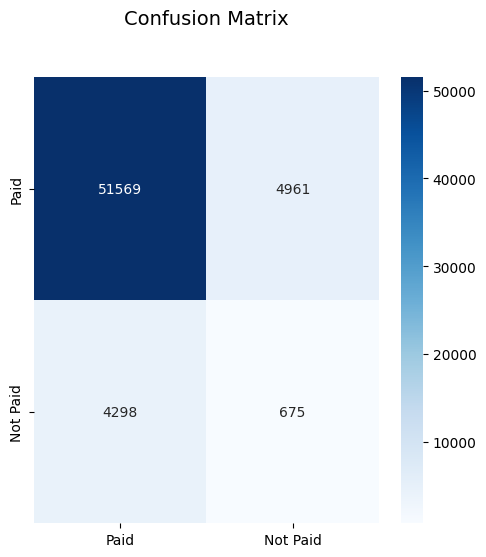

In [32]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, ypred)
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g',
            xticklabels=['Paid', 'Not Paid'],
            yticklabels=['Paid', 'Not Paid'],)
ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1,fontsize=14)
plt.show()

## **HyperParameter Tunning**

### **GridSearch**

In [33]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV


classifier = KerasClassifier(build_fn=create_model, verbose=0)
# defining parameter range
param_grid = {'batch_size': [64],
              'epochs': [100],
              'optimizer': ['Nadam']
}

grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy')

# fitting the model for grid search
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


GridSearchCV(estimator=KerasClassifier(build_fn=<function create_model at 0x7c419075be20>, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [64], 'epochs': [100],
                         'optimizer': ['Nadam']},
             scoring='accuracy')

In [34]:
# print best parameter after tuning
print(grid.best_params_)
print("Best score: ", (grid.best_score_*100))

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'batch_size': 64, 'epochs': 100, 'optimizer': 'Nadam'}
Best score:  90.48974110699366
KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7c419075be20>
	warm_start=False
	random_state=None
	optimizer=Nadam
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)
